# Deep Learning Fundamentals 3 - Keras Exercises

In the previous notebooks, I focused more on the ideas and theories behind basic deep neural networks. My aim is in this notebook to use Keras to practice the neural networks that I have implemented previously.

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

## Hello World of Deep Learning: Fashion MNIST dataset

Firstly, let's load our dataset and split it into train and test sets.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

I'm planning to use two different models on that dataset. In the first one, I will be using Sequential API and in the second one, I will use Functional API. My aim is to have over %90 accuracy on the validation set for both of the models. I will not use any hyperparameter tuning and regularization in these models.

### Sequential Model

Firstly, I want to see whether or not the target variable is skewed. If It is I will use the `class_weight` argument while calling the `fit()` function which would give a larger priority (weight) to underrepresented classes and a lower priority to overrepresented ones. So we would get a higher weight while computing the cost function and this would help us to get a better classifier for all the labels. It may be also good to use the `sample_weight` argument in these cases which give more priority to some samples. There is a nice StackOverflow discussion about the difference between sample_weight and class_weight check it out: [link](https://stackoverflow.com/questions/32492550/what-is-the-difference-between-sample-weight-and-class-weight-options-in-scikit)

Note: we can also add sample_weight to validation_data while compiling.



C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

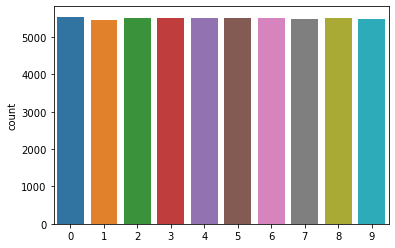

In [4]:
sns.countplot(y_train)

Okay now, let's start constructing our model. I will start with a flattened layer, I guess I have talked about the function `Flatten()`  in my previous notebooks but to revise it, It converts each input into a one-dimensional array. It basically does `.reshape(-1,1)`. I will also set the `input_shape()`. Then in the following layers, I simply used the ReLU activation function and in the last node, since we have 10 different outputs, I will use the softmax activation function. 

Documentation for activation functions: [link](https://keras.io/initializers/.)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(260, activation="relu"))
model.add(keras.layers.Dense(140, activation="relu"))
model.add(keras.layers.Dense(90, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

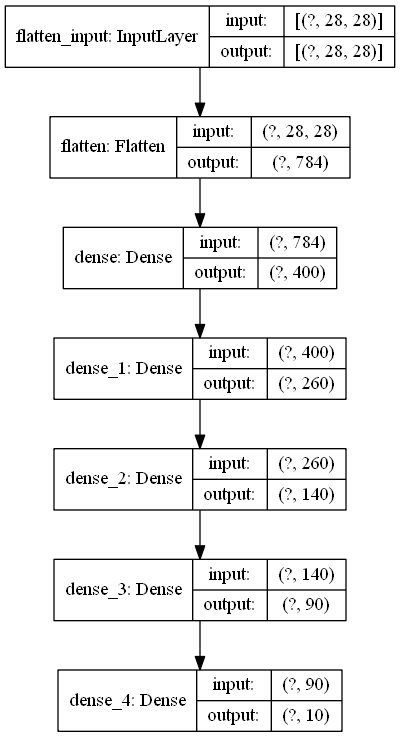

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In my previous notebook, I initialized the weights randomly in addition to initializing the bias as 0. In fact, the `Dense()` function does this automatically.

In [7]:
hdn_lyr1 = model.layers[1]
weights, biases = hdn_lyr1.get_weights()

In [8]:
weights

array([[ 0.06273407,  0.04514893, -0.00901059, ...,  0.0638226 ,
        -0.02724256,  0.01759659],
       [ 0.05610733,  0.0282582 , -0.02378   , ...,  0.04329328,
        -0.02276049,  0.06753001],
       [-0.05292141, -0.01655687,  0.06412166, ..., -0.05307759,
         0.06251279, -0.00323521],
       ...,
       [ 0.05283526,  0.0629485 , -0.04900521, ..., -0.01888835,
         0.01201991, -0.06575525],
       [ 0.06133854,  0.00502718,  0.01579804, ..., -0.04358329,
        -0.06071779,  0.06265812],
       [ 0.04947041,  0.04297568, -0.04578072, ..., -0.04002057,
         0.03814631, -0.05621094]], dtype=float32)

In [9]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The difference here is that in the previous notebook I didn't set the `input_shape` while constructing my model. The weight shape depends on the `input_shape` argument, that's why, If we don't set input_shape as above, the algorithm will wait until we compile the model to get the input_shape as well as weight_shape. Delete the input_shape argument above and notice that you will not be able to get the weights until you compile the model. Initialization is an important step to breaking symmetry and I will revise it again in the following notebooks. 

Documentation for initializers : [link](https://keras.io/initializers/.)

In [10]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),# default learning_rate is 0.01
              metrics=[keras.metrics.sparse_categorical_accuracy])

Here we will have sparse labels. For every instance, we will have an array that shows the probability of being one of the clothes which will look something like this [0, 0.3, 0, 0, 0, 0,2 ,0.9 ,0 ,0 ]. In other words, when we have more than one or two labels we can use ` loss="sparse_categorical_crossentropy"`. If there was one target we could also use `categorical_crossentropy`. Documentation:
1. Cost Functions: [link](https://keras.io/losses)
2. Optimizers: [link](https://keras.io/optimizers)
3. Metrics: [link](https://keras.io/metrics)

Here I will use three Callbacks. In fact, I was gonna write my own Callback but I felt a bit lazy for it today. Let's briefly explore the callbacks that I will be using.
1. **Checkpoint:** This callback saves the model at the end of each epoch. Here I also used the `save_best_only()=True` argument which makes the function save the checkpoint when its performance on validation data is the best so far. Thanks to this callback, even if the model starts overfitting after some epoch we will still have the best model.
2. **Early_stopping:** I won't give much detail about early_stopping since I also introduced this in my machine learning notebooks. `restore_best_weights` is similar to `save_best_only` It saves the weights from the epoch with best values during training. At the end of the training, the model will use these weights. I thought this parameter should be true by default but It is not, probably the reason is it may be costly for training sometimes when this parameter is on. A discussion about that can be found on GitHub [link](https://github.com/keras-team/keras/issues/11371)
3. **Tensorboard:** Tensorboard is an awesome monitoring API in TensorFlow which is sort of similar to our history plot in which we see how the performance changed during the training. Tensorboard, however, provides us with much more information.  It has some other arguments that I really like such as `update_freq` which is batch by default and `write_images` which is also false by default. Check the arguments, the link is below.

For other callbacks: [link](https://keras.io/api/callbacks/)

For custom callbacks there is very good documentation here: [link](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

For more about Tensorboard : [link](https://www.tensorflow.org/tensorboard)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=200,restore_best_weights=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="./my_logs")

history = model.fit(X_train, y_train, epochs=400,batch_size=512,
                    validation_data=(X_valid, y_valid),callbacks=[checkpoint, early_stopping,tensorboard])



Here I directly passed the `validation_data` since we already split our dataset. However, we can also use the `validation_split` argument to use a ratio of our training data for validation. For instance, `validation_split=0.1` tells Keras to use the last 10% of the data for validation. Note: It doesn't shuffle the data.

Let's also evaluate model performance on the test set. Documentation for `evaluate()` method: [link](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3848 - sparse_categorical_accuracy: 0.8854


[0.3848017752170563, 0.8853999972343445]

Let's look at how performance changed during the training.

In [13]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 17620.

Even if I have used tensorboard, let's also look at the classical performance plot.

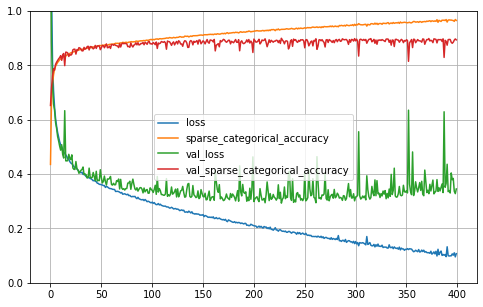

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Note: The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. Therefore, sometimes the performance blot can look like the model performed better on the validation set than on the training set at the beginning of training. 

Okay, one thing that I didn't show before is using the `predict()` method. Firstly, I will use `predict()` on one instance and then show that instance with `imshow()`.

In [15]:
X_new = X_test[:1] # getting the first row
y_proba = model.predict(X_new)
y_proba.round(3) # To get rid of scientific notation, I will use round() function.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Now the model provided us with a sparse array that contains the probabilities of each class. I will convert these values to one-hot vector labels. There is a couple of ways of doing that, the one I generally prefer using `keras.utils.to_categorical() ` function.

In [16]:
tf.keras.utils.to_categorical(np.argmax(y_proba.round(3), axis=1), 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

The algorithm assigns the class to ankle boat which is the 10th class in our target. Let's use `imshow()` function to show the instance.

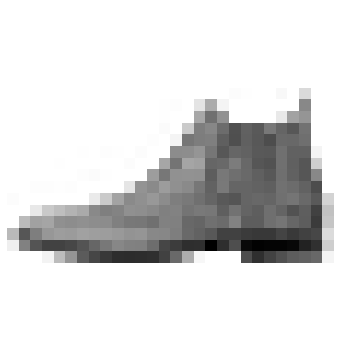

In [17]:
plt.figure(figsize=(10, 6))
for index, image in enumerate(X_new):
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.show()

Instead of one-hot encoding, we could also directly see the class by using the strategy below.

In [18]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9], dtype=int64)

# Functional API

Now we will be implementing a Deep Learning architecture named Wide and Deep Neural Network. This one was a very interesting architecture for me when I first read about it. I am actually a molecular biology student who is interested in neuroscience, therefore, I have a genuine interest in network architectures (I recently see much more interesting architectures in papers). I will be again using the Fashion MNIST dataset (The architecture was originally used for recommender systems).

One of the general ideas behind this model is to have different inputs. We will connect some of our input directly to output layers. The sequential API is not suitable for constructing a model like that since we have different inputs connecting to other layers in a non-sequential way. To construct such a model, we can use the Functional API of TensorFlow.

You can find more about the architecture in the paper. By the way, the paper is really easy to read, I recommend everybody to read it. [The paper](https://arxiv.org/abs/1606.07792)

Additional Note: The name Functional API actually comes from the fact that we use the layers here like functions.

In [ ]:
input_layer = keras.layers.Input(shape=[28,28])
flatten1=keras.layers.Flatten(input_shape=[28, 28])(input_layer)
hidden_layer1 = keras.layers.Dense(120, activation="relu")(flatten1)
hidden_layer2 = keras.layers.Dense(60, activation="relu")(hidden_layer1)

concatenated_layer = keras.layers.concatenate([flatten1, hidden_layer2])
output = keras.layers.Dense(10,activation="softmax")(concatenated_layer)
model = keras.models.Model(inputs=[input_layer], outputs=[output])

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])


history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid))


Let's use `evaluate()` function to look at the model's performance on validation data.

In [20]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 847us/step - loss: 0.3731 - sparse_categorical_accuracy: 0.8886


[0.37307849526405334, 0.8885999917984009]

Okay, now we are done with an example using functional API. Let's now implement a similar structure of the Wide and Deep Neural Network. To do that I will split my training and validation instances.

In [21]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 1:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 1:]

In [22]:
X_train_A.shape

(55000, 5, 28)

I will code a callback which stops the training if the validation accuracy exceeds %90.

In [23]:
class terminate(tf.keras.callbacks.Callback):
     def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_sparse_categorical_accuracy') is not None and logs.get('val_sparse_categorical_accuracy') > 0.90:
            print("\n \n Validation accuracy is reached termination in process...")
            self.model.stop_training = True 

In [24]:
input_wide = keras.layers.Input(shape=X_train_A.shape[1:], name="wide_input")
input_deep = keras.layers.Input(shape=X_train_B.shape[1:], name="deep_input")

flatten_deep=keras.layers.Flatten(input_shape=[26, 28])(input_deep)
hidden_layer1 = keras.layers.Dense(128, activation="relu")(flatten_deep)
hidden_layer2 = keras.layers.Dense(256, activation="relu")(hidden_layer1)
hidden_layer3 = keras.layers.Dense(512, activation="relu")(hidden_layer2)

flatten_wide=keras.layers.Flatten(input_shape=[5, 28])(input_wide)
concat = keras.layers.concatenate([flatten_wide, hidden_layer3])

output = keras.layers.Dense(10, activation="softmax", name="output")(concat)

model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),# default learning_rate is 0.01
              metrics=[keras.metrics.sparse_categorical_accuracy])

callbacks = terminate()
history = model.fit((X_train_A, X_train_B), y_train, epochs=50,validation_data=((X_valid_A, X_valid_B), y_valid), callbacks=callbacks)

In [26]:
model.evaluate((X_valid_A, X_valid_B), y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 0.3251 - sparse_categorical_accuracy: 0.8912


[0.3250572383403778, 0.8912000060081482]

In [27]:
keras.backend.clear_session()

## MNIST NUMBERS

Let's also implement one model one MNIST Number dataset.

In [28]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

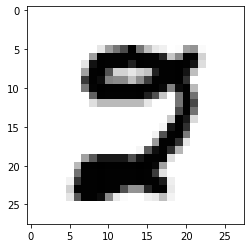

In [30]:
plt.imshow(X_train[13], cmap="binary")

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [33]:
class terminate(tf.keras.callbacks.Callback):
     def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.9860:
            print("\n \n Validation accuracy is reached termination in process...!")
            self.model.stop_training = True 
callbacks = terminate()

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),callbacks=callbacks)

## Time to deal with Regression

Now time to deal with some regression problems. Actually, I don't like doing regression stuff with neural networks but I want to do some practice on the Boston dataset and the covid dataset that I previously used in my machine-learning notes.

### Boston Dataset

Let's load the dataset.

In [35]:
(x_train, y_train), (x_valid, y_valid)=tf.keras.datasets.boston_housing.load_data(
      path="boston_housing.npz", test_split=0.3, seed=85)

Let's scale our predictors.

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)

In [37]:
class terminate(tf.keras.callbacks.Callback):
     def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') is not None and logs.get('val_loss') < 10:
            print("\n \n Validation accuracy is reached termination in process...!")
            self.model.stop_training = True 
callbacks = terminate()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid),callbacks=callbacks)


In [39]:
mse = model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 1ms/step - loss: 9.9964


We can also calculate MSE as we did in machine learning notes.

In [40]:
y_pred = model.predict(X_valid)

mean_squared_error(y_valid, y_pred)

9.996418144370738

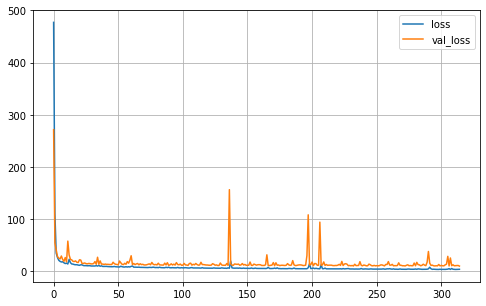

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

### Covid Data

I previously worked on this data in my machine-learning regression exercises. That's why I won't describe the data processing steps that I did to get data ready but you can find them in my machine learning repository.

In [43]:
data=pd.read_csv("dataset/covidtenmost.csv")
data = data.rename(columns={'Sum_Confirmed': 'sum_Confirmed'})

country_list = data['Country'].unique().tolist()
population_list=["66727461","64842509","46647428","17021347","207833823","11419748","9904896","8829628","60673701",
                "145530082"]

hospital_list=["1257","3042","782","549","6738","165","100","350","1048","5300",
                ]
df_population=pd.DataFrame(population_list,columns=["Population"]) # Data frame of population
df_hospital=pd.DataFrame(hospital_list,columns=["Number of Hospitals"]) # Data frame of Hospitals
df_country=pd.DataFrame(country_list,columns=["Country"])
df_GDP=pd.concat([df_country,df_population["Population"].apply(pd.to_numeric,errors='coerce'),
                  df_hospital["Number of Hospitals"].apply(pd.to_numeric,errors='coerce')],axis = 1) # joining data frames
df_GDP

data_final = data.merge(df_GDP, how='left', on = 'Country')

target=pd.DataFrame(data_final["sum_Deaths"])

data_final.drop(["Date","Lat","Median_CaseFatalityRatio","Median_IncidenceRate","Lon","sum_Deaths"],axis=1,inplace=True)

data_final_ohc=pd.get_dummies(data_final, columns=["Country"], drop_first=True)


In [44]:
data_final.drop("Country",axis=1,inplace=True)

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(data_final, target, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)

Time to construct our model.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(480, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(120, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD())
history = model.fit(X_train_s, y_train, epochs=50, validation_data=(X_valid_s, y_valid))

Interesting, I don't think I have a problem with implementation but loss return NaN.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(480, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(120, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam())
history = model.fit(X_train_s, y_train, epochs=50, validation_data=(X_valid_s, y_valid))

I think there is a problem with the gradient, when I used Adam optimization, even though the loss is so high, it is calculated. I look for this nan loss problem on the internet. I found a StackOverflow post about that problem and using gradient_clipping solved the problem so it is probably about that gradients are exploding during the training. [stackoverflow_post](https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(600, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(480, activation="relu"),
    keras.layers.Dense(375, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(clipnorm=1))
history = model.fit(X_train_s, y_train, epochs=100, validation_data=(X_valid_s, y_valid), batch_size=128)

Let's analyze the situation a bit. When we use SGD, we can handle the exploding problem using `clipnorm` and we are dealing with a regression problem. The problem is probably caused by the different scales in our predictors and target. Let's scale our target variable and run the model again. 

You can find more about scaling in this article: [link](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

In [50]:
scaler2 = StandardScaler()
y_train_s = scaler2.fit_transform(y_train)
y_valid_s = scaler2.transform(y_valid)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(600, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(480, activation="relu"),
    keras.layers.Dense(375, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD())
history = model.fit(X_train_s, y_train_s, epochs=100, validation_data=(X_valid_s, y_valid_s), batch_size=128)

In [52]:
model.evaluate(X_valid_s, y_valid_s)

24/24 [==============================] - 0s 3ms/step - loss: 0.0075


0.007515334989875555

In [53]:
y_pred = model.predict(X_valid_s)

In [54]:
inversed = scaler2.inverse_transform(y_pred)

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_valid,inversed)

12544317.143281946

Well looks like my model doesn't perform well on this dataset. I will revisit this model at the end of this notebook to improve it a bit more.

Another option that we can use for scaling the data is the normalization layer.

In [56]:
from tensorflow.keras import layers

predictor_normalizer = layers.experimental.preprocessing.Normalization(input_shape=data_final.shape[1:], axis=None)

predictor_normalizer.adapt(np.array(data_final))

Let's also scale our target feature

In [57]:

scaler_norm = MinMaxScaler()
y_train_norm = scaler_norm.fit_transform(target)

In [58]:
horsepower_model = keras.Sequential([
    predictor_normalizer,
    keras.layers.Dense(300, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam())
history = model.fit(data_final, y_train_norm, epochs=100, batch_size=128,validation_split = 0.3)

In [60]:
ypredict=model.predict(data_final)
inversed = scaler_norm.inverse_transform(ypredict)
mean_squared_error(target,inversed)

4.3762266049635104e+17

There is very good documentation about this normalization layer : [link](https://www.tensorflow.org/tutorials/keras/regression#regression_using_a_dnn_and_multiple_inputs)

## Deep and Wide Neural Network for Regression

Okay now, Let's also use this deep and wide architecture for a regression problem. Here, I will fit the model on the Boston dataset.

In [61]:
(x_train, y_train), (x_valid, y_valid)=tf.keras.datasets.boston_housing.load_data(
      path="boston_housing.npz", test_split=0.3, seed=85)

Splitting the training instances.

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)

In [63]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]

Building the model

In [64]:
input_wide = keras.layers.Input(shape=X_train_wide.shape[1:], name="wide_model")
input_deep= keras.layers.Input(shape=X_train_deep.shape[1:], name="deep_model")
hidden_layer1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden_layer2 = keras.layers.Dense(30, activation="relu")(hidden_layer1)
concat_layer = keras.layers.concatenate([input_wide, hidden_layer2])
output = keras.layers.Dense(1, name="output")(concat_layer)
model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])

In [65]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

In [66]:
X_train_deep.shape

(354, 11)

In [ ]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=30,validation_data=((X_valid_wide, X_valid_deep), y_valid))

In [68]:
model.evaluate((X_valid_wide, X_valid_deep), y_valid)

5/5 [==============================] - 0s 799us/step - loss: 15.7981


15.798072814941406

## Sub Class API

Up to now, we only dealt with Sequential and Functional API, Now It's time to go to the third one which provides us the most flexibility. The functional API is declarative, in other words, it is static. We cannot add loops, or basic dynamic behaviors using Sequential and Functional API. On the other hand, Sub Class API provides us with that freedom.

In [69]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units1=60,units2=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer1 = keras.layers.Dense(units1, activation=activation)
        self.hidden_layer2 = keras.layers.Dense(units2, activation=activation)
        self.model_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        hidden_layer1 = self.hidden_layer1(input_deep)
        hidden_layer2 = self.hidden_layer2(hidden_layer1)
        concat_layer = keras.layers.concatenate([input_wide, hidden_layer2])
        output = self.model_output(concat_layer)
        return output

model = WideAndDeepModel(60,30,activation="relu")

The basic steps to do
1. Create the layers that you are going to use in your model in the constructor.
2. By using the method `call()` perform the computations.

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=30,validation_data=((X_valid_wide, X_valid_deep), y_valid))



In [71]:
model.evaluate((X_valid_wide, X_valid_deep), y_valid)

5/5 [==============================] - 0s 1ms/step - loss: 14.7139


14.713883399963379

Subclass API looks very much like the Functional API (actually it looks more like PyTorch). Using SubClass API you can do pretty much anything you want in the `call()` method: for loops, if statements. etc...

Now Let's also add an additional output.

In [72]:
input_wide = keras.layers.Input(shape=X_train_wide.shape[1:], name="wide_model")
input_deep= keras.layers.Input(shape=X_train_deep.shape[1:], name="deep_model")
hidden_layer1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden_layer2 = keras.layers.Dense(30, activation="relu")(hidden_layer1)
concat_layer = keras.layers.concatenate([input_wide, hidden_layer2])
main_output = keras.layers.Dense(1, name="output")(concat_layer)
additional_output = keras.layers.Dense(1, name="additional_output")(hidden_layer2)
model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[main_output, additional_output])

In [73]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

Each output needs its own loss function. Therefore, when we compile the model, we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight. Fortunately, it is possible to set all the loss weights when compiling the model: - [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) 

In [ ]:
history = model.fit((X_train_wide, X_train_deep),[y_train, y_train], epochs=30,
                    validation_data=((X_valid_wide, X_valid_deep), [y_valid, y_valid]))

In [75]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_valid_wide, X_valid_deep], [y_valid, y_valid])


5/5 [==============================] - 0s 1ms/step - loss: 14.9746 - output_loss: 14.9761 - additional_output_loss: 14.9613


Now when we train the model, we need to provide labels for each output. In this example, since we are trying to predict the same thing, we need to pass (y_train,y_train)

In [76]:
y_pred_main, y_pred_aux = model.predict([X_train_wide, X_train_deep])

## Regression for Covid Dataset Revisited

Okay, the regression performance for Covid Dataset was awful. I thought I could perhaps improve it a bit and built the model below. I didn't improve much, in fact, I could improve it more if I used hyperparameter tuning but I keep this subject for another day. On the other hand, I don't think spending time on this regression problem is important since deep learning models are rarely used for regression.

A good discussion about Regression with MLP [link](https://stats.stackexchange.com/questions/319349/why-doesnt-deep-learning-work-as-well-in-regression-as-in-classification)

To omit the Country column while scaling I will use `ColumnTransformer()`

In [77]:
num_pipeline = Pipeline([
         ('polynomial_features',PolynomialFeatures(degree=3)),#4
        ('minmax-scaler', MinMaxScaler()),
        
    ])

preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('mm', num_pipeline , ['sum_Confirmed','sum_Recovered','sum_Active','Population','Number of Hospitals'])
        ])
covid_prepared = preprocessor.fit_transform(data_final_ohc)

In [78]:
covid_prepared.shape

(3011, 65)

Let's split our data.

In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(covid_prepared, target, random_state=42)

Normalizing the target:

In [80]:
normalizer=MinMaxScaler()
y_train_norm=normalizer.fit_transform(y_train)
y_valid_norm=normalizer.transform(y_valid)

Implementing the model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(420, activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(60, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(lr=3e-4))
history = model.fit(X_train, y_train_norm, epochs=4000, validation_data=(X_valid, y_valid_norm),batch_size=128)

In [82]:
predict_adam=model.predict(X_valid)

mean_squared_error(y_valid,normalizer.inverse_transform(predict_adam))

194023.6878192994

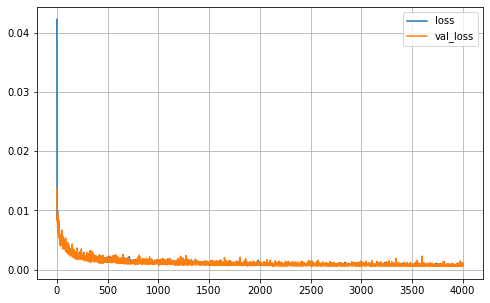

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## Notes:

Actually, there is a function called `KerasRegressor()` which I didn't use here but it can be used for implementing neural networks for a regression problem. You can find very good examples of that function by clicking the [link](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

I found a discussion about setting `clipnorm=00.1` while using Adam optimization and tried it. This didn't yield a much better performance but actually improved the covid model a bit. I also add the link about this discussion here [link](https://github.com/fizyr/keras-retinanet/issues/942)